In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hdsemg_force_regression.hyser import hyser as hy

In [2]:
xraw = hy.load_hdsemg(
    dataset=hy.Dataset.RANDOM,
    idx_subject=0,
    idx_session=0,
    pr_task_type=None,
    hdsemg_signal_type=hy.SignalType.RAW,
    idx_finger=None,
    idx_combination=None,
    force_direction=None,
    idx_repetition=0,
)

xppr = hy.load_hdsemg(
    dataset=hy.Dataset.RANDOM,
    idx_subject=0,
    idx_session=0,
    pr_task_type=None,
    hdsemg_signal_type=hy.SignalType.PREPROCESS,
    idx_finger=None,
    idx_combination=None,
    force_direction=None,
    idx_repetition=0,
)

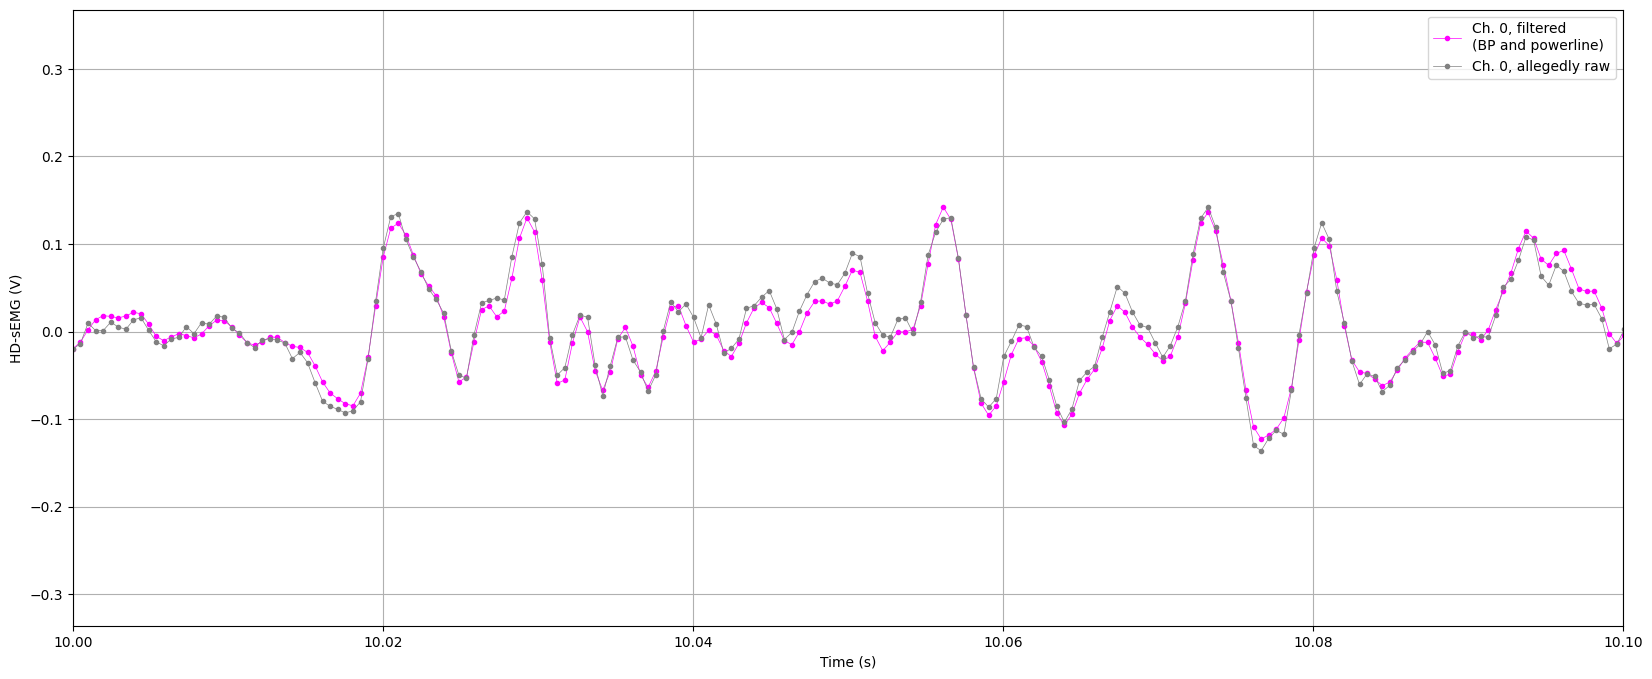

In [3]:
times_s = np.arange(hy.NUM_SAMPLES_HDSEMG_RANDOM) / hy.FS_HDSEMG

plt.figure(figsize=(20.0, 8.0))
plt.xlabel("Time (s)")
plt.ylabel("HD-sEMG (V)")
plt.plot(times_s, xppr[0], '.-', color=(1.0, 0.0, 1.0), linewidth=0.5, label="Ch. 0, filtered\n(BP and powerline)")
plt.plot(times_s, xraw[0], '.-', color=(0.5, 0.5, 0.5), linewidth=0.5, label="Ch. 0, allegedly raw")
plt.legend()
plt.grid()
plt.axis([10.0, 10.0 + 0.1, None, None])
#plt.axis([0.0, 4.0, None, None])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


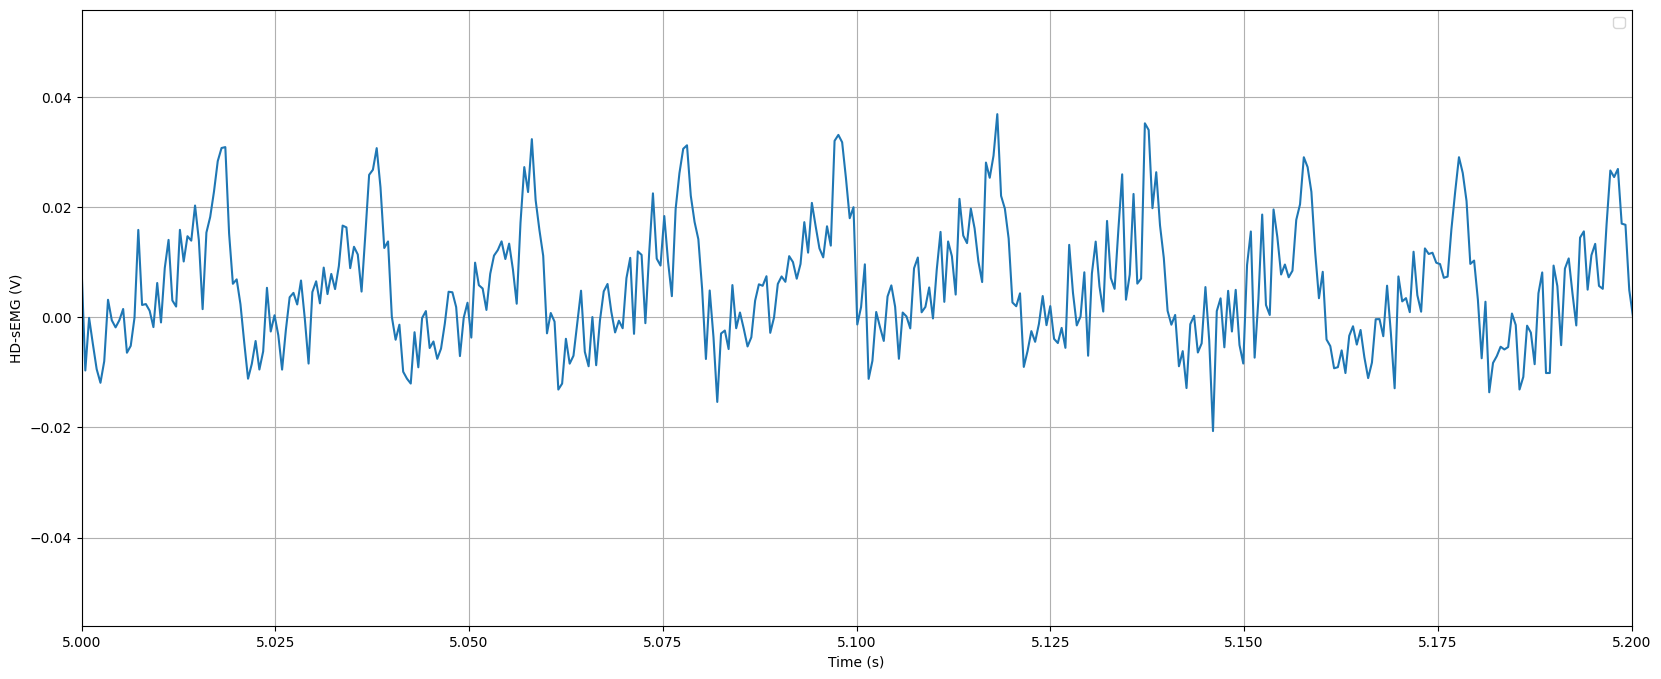

In [7]:
plt.figure(figsize=(20.0, 8.0))
plt.xlabel("Time (s)")
plt.ylabel("HD-sEMG (V)")
plt.plot(times_s, xppr[0] - xraw[0])
plt.legend()
plt.grid()
#plt.axis([10.0, 10.0 + 0.1, None, None])
plt.axis([5.0, 5.2, None, None])
plt.show()

In [76]:
from scipy import signal

# concatenate all channels
xppr_cat = np.concatenate([xppr[_] for _ in range(hy.NUM_CHANNELS_HDSEMG)])
xraw_cat = np.concatenate([xraw[_] for _ in range(hy.NUM_CHANNELS_HDSEMG)])

f, Pxx_den = signal.periodogram(xppr_cat - xraw_cat, fs=2048.0)

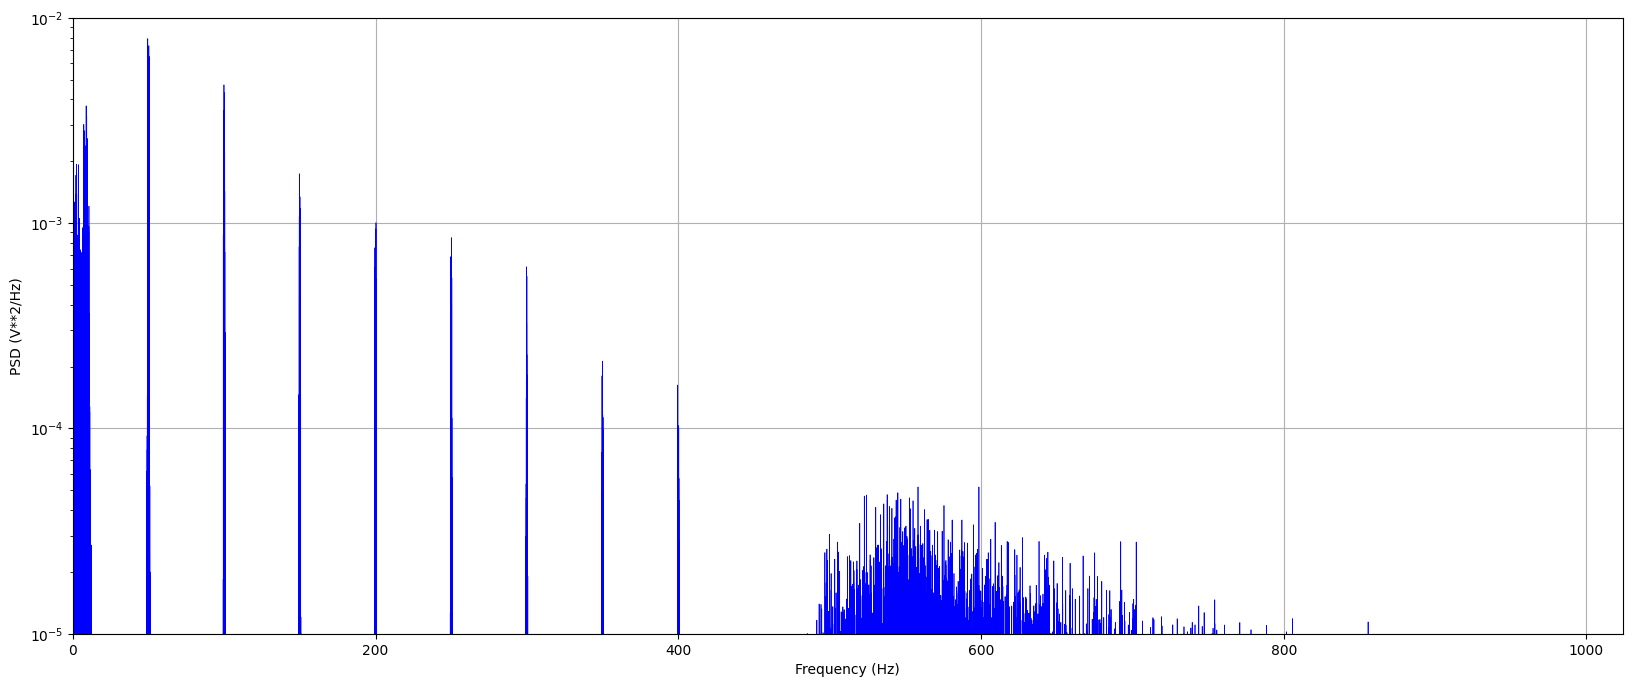

In [80]:
plt.figure(figsize=(20.0, 8.0))
plt.semilogy(f, Pxx_den, 'b-', linewidth=0.5)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V**2/Hz)")
plt.grid()
plt.axis([0.0, 1024.0, 1e-5, 1e-02])
plt.show()